<a href="https://colab.research.google.com/github/Piyush01Bhatt/Deep-Learning/blob/master/DeepANN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this we will build a 3 layer deep Neural Network with Tensorflow for MNIST fashion
dataset

In [0]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

**Load the dataset **

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [3]:
print(f'Shape of x_train = {x_train.shape}')
print(f'Shape of x_test = {x_test.shape}')

Shape of x_train = (60000, 28, 28)
Shape of x_test = (10000, 28, 28)




1.   There are 60000 sample images in the training set each of 28 x 28 size
2.   There are 10000 sample images in the test set with the same image size of 28 x 28



In [4]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)



1.   There are total of 10 labels to train from 0-9



**Set some variables to use**

In [6]:
img_flatten = x_train[0].shape[0] ** 2
print(f'size of flatten image = {img_flatten}')
img_shape = x_train[0].shape
print(f'image shape = {img_shape}')
num_classes = len(np.unique(y_train))
print(f'number of classes to train = {num_classes}')

size of flatten image = 784
image shape = (28, 28)
number of classes to train = 10


For training purposes we need to one hot encode the labels

In [0]:
y_train_encoded = np.eye(num_classes)[y_train]
y_test_encoded = np.eye(num_classes)[y_test]

In [8]:
y_train_encoded[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
y_test[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [11]:
y_test_encoded[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

**Helper function for plotting images**

In [0]:
def plot_images(images, cls_true, cls_pred=None):
  
  f,ax = plt.subplots(3,3)
  f.subplots_adjust(hspace=0.3, wspace=0.3)
  
  for i,ax in enumerate(ax.flat):
    ax.imshow(images[i].reshape(img_shape), cmap='binary')
    
    if cls_pred is None:
      xlabel = 'True: {0}'.format(cls_true[i])
    else:
      xlabel = 'True: {0}, Pred: {1}'.format(cls_true[i], cls_pred[i])
    
    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
  plt.show()
    

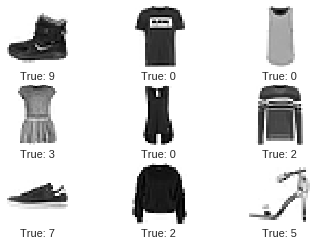

In [13]:
images = x_train[0:10]
labels = y_train[0:10]
plot_images(images=images,cls_true=labels)

**Tensorflow Graph**

In [0]:
#Setting The placeholder variables
# 1. Placeholder for taking input images
x = tf.placeholder(tf.float32, [None, img_flatten])
# This will create a input tensor of [None, 784] dimension
# That means any input samples of 784 dimension each

In [0]:
# 2. Placeholder variable for output
y = tf.placeholder(tf.float32, [None, num_classes])
# This is for encoded output 
# for each input 10 float values for each class will be out
# max value will be the true label

In [0]:
y_true_cls = tf.placeholder(tf.int64,[None])
# Since this holds true values from either [0-9]
# So its a 1-D tensor for getting true label for each output

**Lets create helper functions to get Variables of weights and biases**

In [0]:
def new_weights(shape):
  return tf.Variable(tf.truncated_normal(shape, stddev=1))

def new_biases(length):
  return tf.Variable(tf.constant(0.05, shape=[length]))

**Helper function to create inner layers**

In [0]:
def new_layer(input: 'input from previous layer',
              shape: 'a list to define weights dimensions',
              use_relu: 'Use ReLU as activation fuction'=True):
  
  w = new_weights(shape=shape)
  b = new_biases(length=shape[1])
  
  layer = tf.matmul(input, w) + b
  
  if use_relu:
    layer = tf.nn.relu(layer)
   
  return layer,w
  

**Defining layers**

In [19]:
layer1,w1 = new_layer(input=x,
                   shape=[784,1000])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
layer1 #hidden layer1

<tf.Tensor 'Relu:0' shape=(?, 1000) dtype=float32>

In [0]:
layer2,w2 = new_layer(input=layer1,
                   shape=[1000,1200])

In [22]:
layer2 # hidden layer2

<tf.Tensor 'Relu_1:0' shape=(?, 1200) dtype=float32>

In [0]:
layer3,w3 = new_layer(input=layer2,
                      shape=[1200,1000])

In [24]:
layer3 # hidden layer3

<tf.Tensor 'Relu_2:0' shape=(?, 1000) dtype=float32>

In [0]:
layer4,w4 = new_layer(input=layer3,
                      shape=[1000,10],
                      use_relu=False)

In [26]:
layer4 # output layer

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

In [0]:
y_pred = tf.nn.softmax(layer4)

In [0]:
y_pred_cls = tf.argmax(y_pred, axis=1)

**Cost Function to be optimised**

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer4,
                                                           labels=y)

In [0]:
cost = tf.reduce_mean(cross_entropy)

**Optimization**

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

**Performance Measures**

In [0]:
correct_prediction = tf.equal(y_pred_cls,y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**Running Tensorflow**

In [0]:
session = tf.Session()

**Initialize variables**

In [0]:
session.run(tf.global_variables_initializer())

**Helper function to get train in batches**

In [0]:
train_batch_size = 250

In [0]:
def next_batch(num, data, labels):
  '''
    Return a total of 'num' random samples and labels
  '''
  idx = np.arange(0, len(data))
  np.random.shuffle(idx)
  idx = idx[:num]
  data_shuffle = [data[i] for i in idx]
  labels_shuffle = [labels[i] for i in idx]
  
  return np.asarray(data_shuffle), np.asarray(labels_shuffle)

**Helper function for optimization iterations**

In [0]:
feed_dict_test = {
    x: x_test.reshape(-1,784),
    y: y_test_encoded,
    y_true_cls: y_test
}

In [0]:
def print_accuracy():
  acc = session.run(accuracy, feed_dict=feed_dict_test)
  print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
def optimize(num_iterations):
  for i in range(1,num_iterations+1):
    x_batch, y_true_batch = next_batch(num = train_batch_size,
                                       data = x_train,
                                       labels = y_train_encoded)
    # setting placeholder values
    feed_dict_train = {
        x : x_batch.reshape(-1,784),
        y : y_true_batch
    }
    
    session.run(optimizer, feed_dict=feed_dict_train)
    
    if(i%100==0):
      print_accuracy()

In [0]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = y_test
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [43]:
print_accuracy()

Accuracy on test-set: 6.8%


In [0]:
#optimization after one iteration
optimize(1)

In [45]:
print_accuracy()

Accuracy on test-set: 6.9%


In [46]:
optimize(100)

Accuracy on test-set: 56.8%


In [47]:
optimize(200)

Accuracy on test-set: 67.2%
Accuracy on test-set: 71.3%


In [48]:
optimize(1000)

Accuracy on test-set: 72.8%
Accuracy on test-set: 74.3%
Accuracy on test-set: 75.1%
Accuracy on test-set: 76.2%
Accuracy on test-set: 77.0%
Accuracy on test-set: 77.4%
Accuracy on test-set: 77.7%
Accuracy on test-set: 78.0%
Accuracy on test-set: 78.1%
Accuracy on test-set: 78.4%


In [49]:
optimize(5000)

Accuracy on test-set: 78.9%
Accuracy on test-set: 79.2%
Accuracy on test-set: 79.0%
Accuracy on test-set: 79.1%
Accuracy on test-set: 79.6%
Accuracy on test-set: 79.5%
Accuracy on test-set: 79.6%
Accuracy on test-set: 80.0%
Accuracy on test-set: 80.1%
Accuracy on test-set: 80.1%
Accuracy on test-set: 79.8%
Accuracy on test-set: 80.6%
Accuracy on test-set: 80.3%
Accuracy on test-set: 80.6%
Accuracy on test-set: 80.4%
Accuracy on test-set: 80.6%
Accuracy on test-set: 80.5%
Accuracy on test-set: 80.4%
Accuracy on test-set: 80.5%
Accuracy on test-set: 80.5%
Accuracy on test-set: 80.9%
Accuracy on test-set: 80.7%
Accuracy on test-set: 81.1%
Accuracy on test-set: 81.0%
Accuracy on test-set: 81.3%
Accuracy on test-set: 81.4%
Accuracy on test-set: 81.5%
Accuracy on test-set: 81.4%
Accuracy on test-set: 81.7%
Accuracy on test-set: 81.4%
Accuracy on test-set: 81.2%
Accuracy on test-set: 81.2%
Accuracy on test-set: 81.4%
Accuracy on test-set: 80.8%
Accuracy on test-set: 81.3%
Accuracy on test-set

In [50]:
print_accuracy()

Accuracy on test-set: 81.6%


In [51]:
optimize(5000)

Accuracy on test-set: 82.0%
Accuracy on test-set: 82.0%
Accuracy on test-set: 82.0%
Accuracy on test-set: 81.8%
Accuracy on test-set: 82.0%
Accuracy on test-set: 81.8%
Accuracy on test-set: 82.1%
Accuracy on test-set: 82.0%
Accuracy on test-set: 82.2%
Accuracy on test-set: 82.3%
Accuracy on test-set: 82.0%
Accuracy on test-set: 82.2%
Accuracy on test-set: 82.2%
Accuracy on test-set: 82.3%
Accuracy on test-set: 82.1%
Accuracy on test-set: 82.2%
Accuracy on test-set: 82.3%
Accuracy on test-set: 82.5%
Accuracy on test-set: 82.3%
Accuracy on test-set: 82.3%
Accuracy on test-set: 82.3%
Accuracy on test-set: 81.9%
Accuracy on test-set: 82.3%
Accuracy on test-set: 82.4%
Accuracy on test-set: 82.5%
Accuracy on test-set: 82.4%
Accuracy on test-set: 82.2%
Accuracy on test-set: 82.0%
Accuracy on test-set: 82.0%
Accuracy on test-set: 82.5%
Accuracy on test-set: 82.5%
Accuracy on test-set: 82.5%
Accuracy on test-set: 82.5%
Accuracy on test-set: 82.6%
Accuracy on test-set: 82.1%
Accuracy on test-set

In [52]:
print_accuracy()

Accuracy on test-set: 82.7%


In [53]:
optimize(5000)

Accuracy on test-set: 83.0%
Accuracy on test-set: 82.6%
Accuracy on test-set: 82.7%
Accuracy on test-set: 82.9%
Accuracy on test-set: 83.0%
Accuracy on test-set: 82.0%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.5%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.7%
Accuracy on test-set: 83.1%
Accuracy on test-set: 82.3%
Accuracy on test-set: 83.2%
Accuracy on test-set: 83.1%
Accuracy on test-set: 82.8%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.7%
Accuracy on test-set: 82.4%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.7%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.9%
Accuracy on test-set: 83.0%
Accuracy on test-set: 82.7%
Accuracy on test-set: 82.8%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.4%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.6%
Accuracy on test-set: 82.9%
Accuracy on test-set: 82.7%
Accuracy on test-set: 82.8%
Accuracy on test-set: 83.1%
Accuracy on test-set: 82.6%
Accuracy on test-set: 82.8%
Accuracy on test-set

So final accuracy score for a 3 layer deep ANN is approx 83.5%. after 17000 iterations.
I guess accuracy will improve with more iterations or increased hidden layers